<a href="https://colab.research.google.com/github/Anmol1904/Projects/blob/main/Exercise_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:

import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

Load the dataset

In [2]:
uploaded = files.upload()

Saving Data Take Home Assignment 1 Exercise A.xlsx to Data Take Home Assignment 1 Exercise A.xlsx


In [3]:
data=pd.read_excel('/content/Data Take Home Assignment 1 Exercise A.xlsx')

In [4]:
print(data)

          X       Y
0      8.34  480.48
1     23.64  445.75
2     29.74  438.76
3     19.07  453.09
4     11.80  464.43
...     ...     ...
9563  15.12  462.59
9564  33.41  432.90
9565  15.99  465.96
9566  17.65  450.93
9567  23.68  451.67

[9568 rows x 2 columns]


In [5]:
print(data.head())

       X       Y
0   8.34  480.48
1  23.64  445.75
2  29.74  438.76
3  19.07  453.09
4  11.80  464.43


Finding our group dataset

Formula to calculate which rows belong to your group:

In [6]:
group_num=17
start_row = (group_num - 1) * 20 + 2
end_row   = group_num * 20 + 1


Convert Excel row numbers (starting at 1) to Python indices (starting at 0)

In [7]:
start_index=start_row-1
end_index=end_row


Selecting 20 rows from the dataset, using iloc[]

iloc[] → selects specific rows by their position

In [8]:
group_data=data.iloc[start_index:end_index].copy()

In [9]:
print(f"\nGroup {group_num} data (rows {start_row} to {end_row}):")
print(group_data)


Group 17 data (rows 322 to 341):
         X       Y
321  26.53  439.96
322  31.59  442.58
323  24.06  436.88
324  27.28  441.94
325  23.69  438.62
326  11.46  470.55
327  22.61  441.76
328  21.84  450.88
329   9.20  482.89
330  17.75  454.41
331   7.53  479.15
332  16.76  458.67
333  22.69  446.91
334  11.91  466.52
335  26.63  444.16
336   6.72  489.09
337   9.44  475.01
338  18.32  471.43
339  18.31  455.24
340  26.57  445.49


iloc[:, 0] → selects the first column.

iloc[:, 1] → selects the second column.

.values → converts them to a NumPy array for mathematical operations.

.reshape(-1, 1) → ensures the data is in a column format (not a single row).

In [10]:
'''iloc[:, 0] → selects the first column.

iloc[:, 1] → selects the second column.

.values → converts them to a NumPy array for mathematical operations.

.reshape(-1, 1) → ensures the data is in a column format (not a single row).'''
X_raw = group_data.iloc[:, 0].values.reshape(-1, 1)
Y_raw = group_data.iloc[:, 1].values.reshape(-1, 1)

Transform the data (Standardization)

In [11]:
mean_x=np.mean(X_raw)
std_x=np.std(X_raw)

In [12]:
x=(X_raw-mean_x)/std_x

In [13]:
print(f"\nMean of X = {mean_x:.4f}")
print(f"Standard Deviation of X = {std_x:.4f}")
print("\nTransformed (standardized) X values:")
print(x)


Mean of X = 19.0445
Standard Deviation of X = 7.3007

Transformed (standardized) X values:
[[ 1.02531751]
 [ 1.71840502]
 [ 0.68699218]
 [ 1.12804787]
 [ 0.63631187]
 [-1.03887791]
 [ 0.48838014]
 [ 0.3829103 ]
 [-1.34843874]
 [-0.17731261]
 [-1.57718501]
 [-0.31291668]
 [ 0.49933805]
 [-0.9772397 ]
 [ 1.03901489]
 [-1.68813381]
 [-1.31556502]
 [-0.09923753]
 [-0.10060727]
 [ 1.03079646]]


In [14]:
#add a column of ones to X (It will work as Intercept)
x_new=np.hstack((np.ones_like(x), x))

In [15]:
print(x_new)

[[ 1.          1.02531751]
 [ 1.          1.71840502]
 [ 1.          0.68699218]
 [ 1.          1.12804787]
 [ 1.          0.63631187]
 [ 1.         -1.03887791]
 [ 1.          0.48838014]
 [ 1.          0.3829103 ]
 [ 1.         -1.34843874]
 [ 1.         -0.17731261]
 [ 1.         -1.57718501]
 [ 1.         -0.31291668]
 [ 1.          0.49933805]
 [ 1.         -0.9772397 ]
 [ 1.          1.03901489]
 [ 1.         -1.68813381]
 [ 1.         -1.31556502]
 [ 1.         -0.09923753]
 [ 1.         -0.10060727]
 [ 1.          1.03079646]]


In [17]:
#mathematical formula for Least Squares
#Linear Algebra module of NumPy (linalg)
# inv() function used for calculating inverse
theta_new = np.linalg.inv(x_new.T @ x_new) @ (x_new.T @ Y_raw)

In [18]:
# Extract the coefficients
theta0_new = theta_new[0, 0]  # intercept
theta1_new = theta_new[1, 0]  # slope


In [19]:
print("\nClosed-form Linear Regression Parameters:")
print(f"Theta0 (intercept) = {theta0_new:.6f}")
print(f"Theta1 (slope) = {theta1_new:.6f}")



Closed-form Linear Regression Parameters:
Theta0 (intercept) = 456.607000
Theta1 (slope) = -14.859831


In [20]:
#@ -> matrix multiplication
y_pred=x_new @ theta_new

In [21]:
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

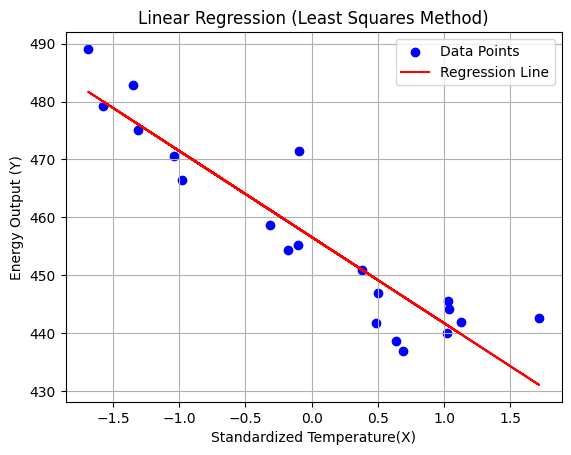

In [22]:
plt.scatter(x, Y_raw, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression (Least Squares Method)')
plt.xlabel('Standardized Temperature(X)')
plt.ylabel('Energy Output (Y)')
plt.legend()
plt.grid(True)
plt.show()